In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def plot_evaluation_metrics(algorithm_name, y_true, y_pred):
    # Convert y_true and y_pred to 1-dimensional arrays
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    # Compute evaluation metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='macro')
    rec = recall_score(y_true, y_pred,average='macro')
    f1 = f1_score(y_true, y_pred,average='macro')
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=cm, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
    plt.xlabel('Predicted label', fontsize=16)
    plt.ylabel('True label', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Confusion Matrix - {}'.format(algorithm_name), fontsize=16)
    plt.savefig('confusion_matrix_{}.jpeg'.format(algorithm_name))
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('ROC Curve - {}'.format(algorithm_name), fontsize=16)
    plt.legend(loc='lower right', fontsize=14)
    plt.savefig('roc_curve_{}.jpeg'.format(algorithm_name))
    plt.show()
    
    # Print evaluation metrics
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1:', f1)
    print('AUC-ROC:', roc_auc)


In [3]:
def get_data(data_n):
    data = pd.read_csv("churn.csv")
    DATA = np.array(data)
    DATA_n = DATA[:,:-1]
    traindata, testdata, y_train, y_test = train_test_split(DATA_n, DATA[:,-1], test_size= 0.20, random_state=42)
    X_train = np.array(traindata)
    X_test = np.array(testdata)

    return X_train, y_train, X_test, y_test 
X_train, y_train, X_test, y_test = get_data('churn')


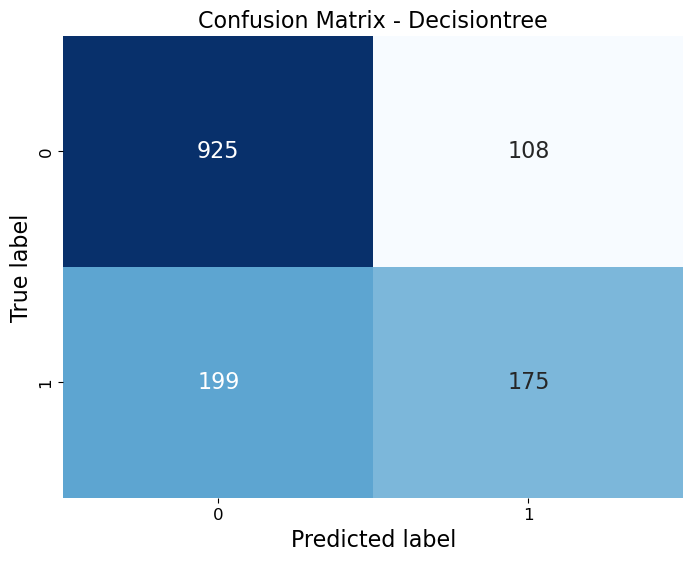

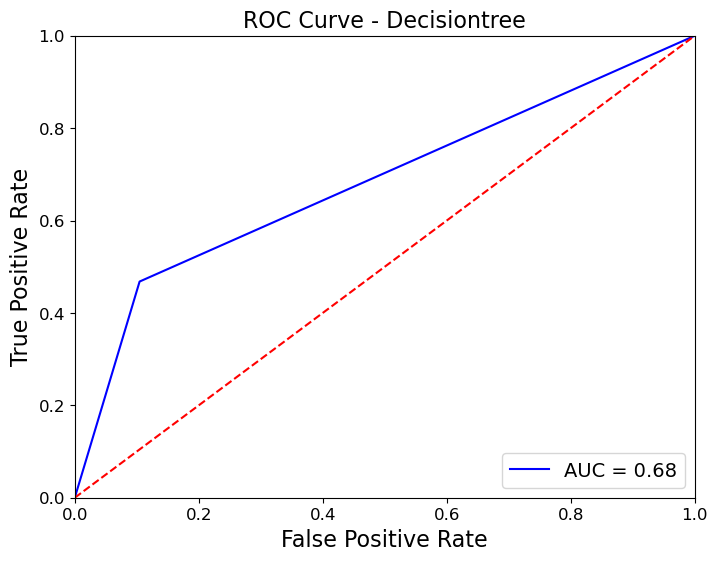

Accuracy: 0.7818052594171997
Precision: 0.7206641474793456
Recall: 0.6816822918554027
F1: 0.695198599441555
AUC-ROC: 0.6816822918554026


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 7, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
plot_evaluation_metrics('Decisiontree',y_test, y_pred)

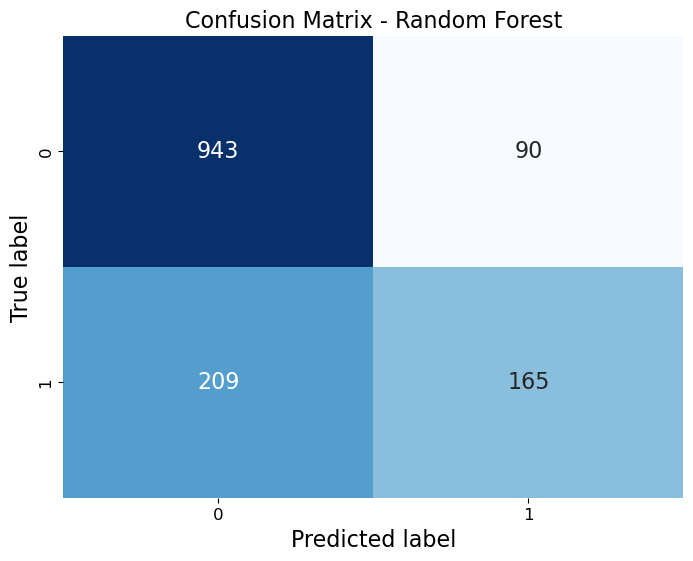

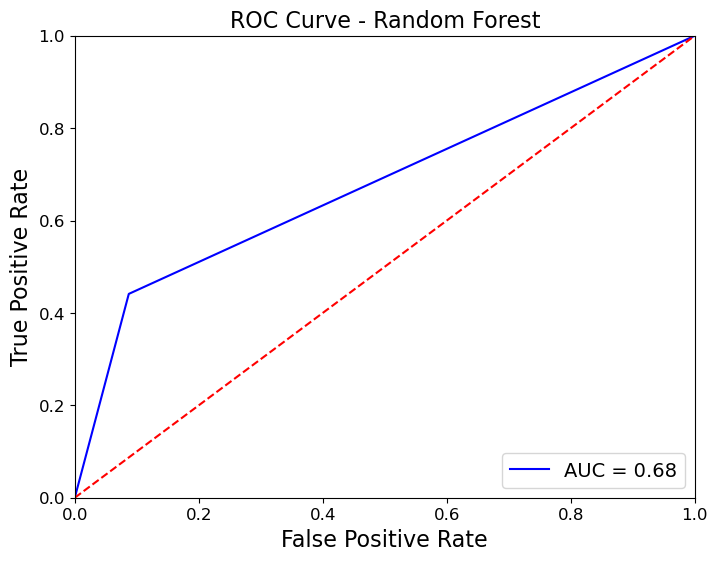

Accuracy: 0.7874911158493249
Precision: 0.7328176062091503
Recall: 0.6770257957975059
F1: 0.6939000920425069
AUC-ROC: 0.6770257957975059


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Plot evaluation metrics
plot_evaluation_metrics('Random Forest', y_test, y_pred)


C:\Users\DEll\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


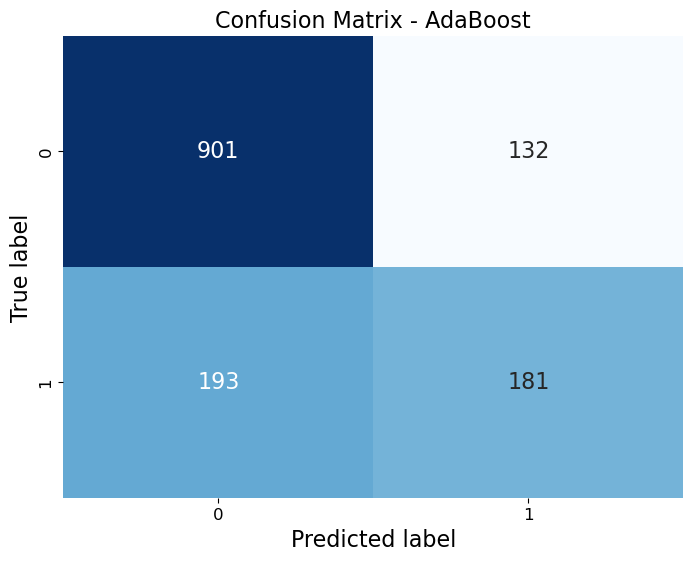

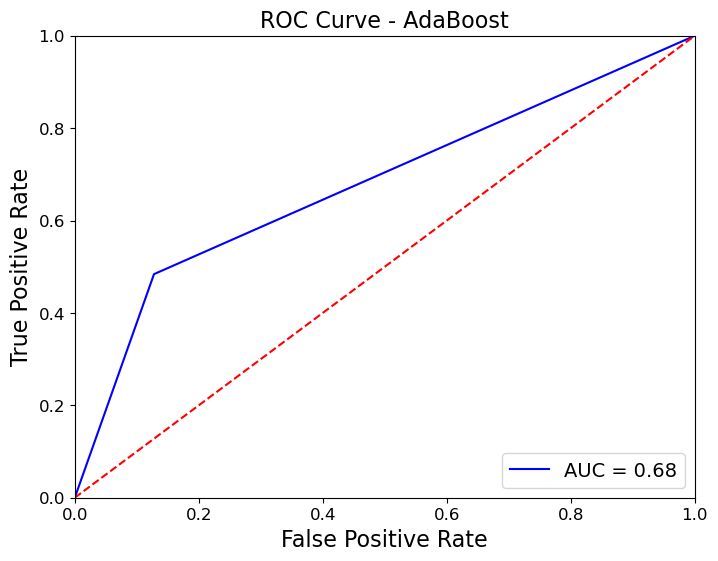

Accuracy: 0.7690120824449183
Precision: 0.7009289706852948
Recall: 0.6780870316973044
F1: 0.6870656541082321
AUC-ROC: 0.6780870316973044


In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Train an AdaBoost classifier with a Decision Tree base estimator
dtc = DecisionTreeClassifier(min_samples_leaf = 1, max_depth=7, random_state=42)
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=100, random_state=42)
abc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = abc.predict(X_test)

# Plot evaluation metrics
plot_evaluation_metrics('AdaBoost', y_test, y_pred)


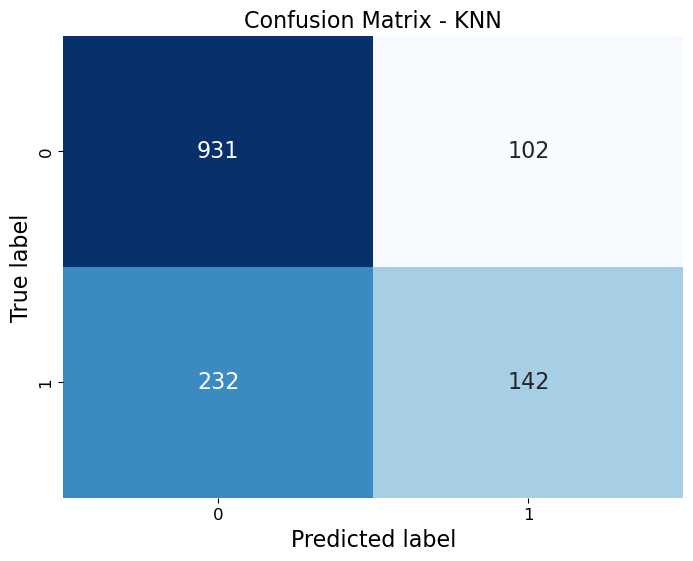

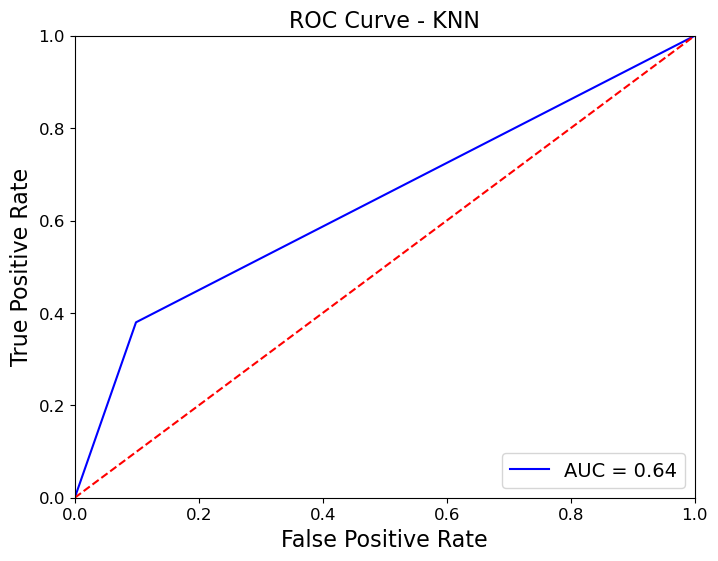

Accuracy: 0.7626154939587776
Precision: 0.6912415601257347
Recall: 0.6404688074296867
F1: 0.6537261039489275
AUC-ROC: 0.6404688074296866


In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Plot evaluation metrics
plot_evaluation_metrics('KNN', y_test, y_pred)


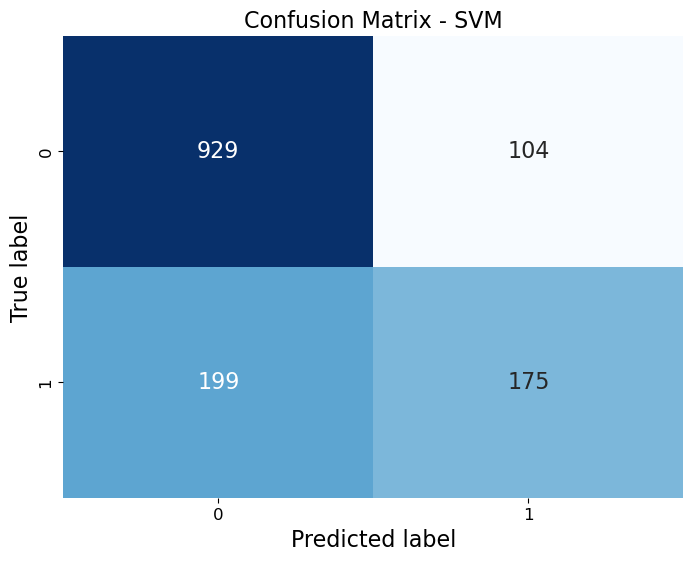

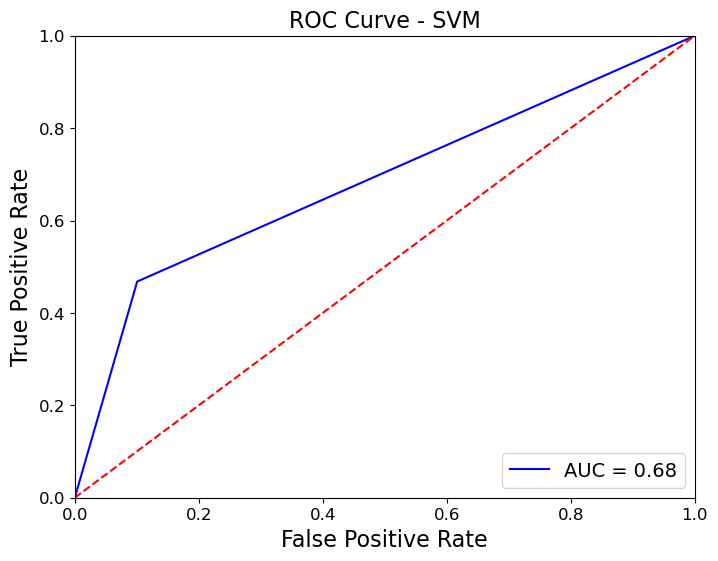

Accuracy: 0.7846481876332623
Precision: 0.7254108518264317
Recall: 0.6836184002774743
F1: 0.6978874422184159
AUC-ROC: 0.6836184002774742


In [8]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(kernel='rbf', C = 0.5,random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Plot evaluation metrics
plot_evaluation_metrics('SVM', y_test, y_pred)


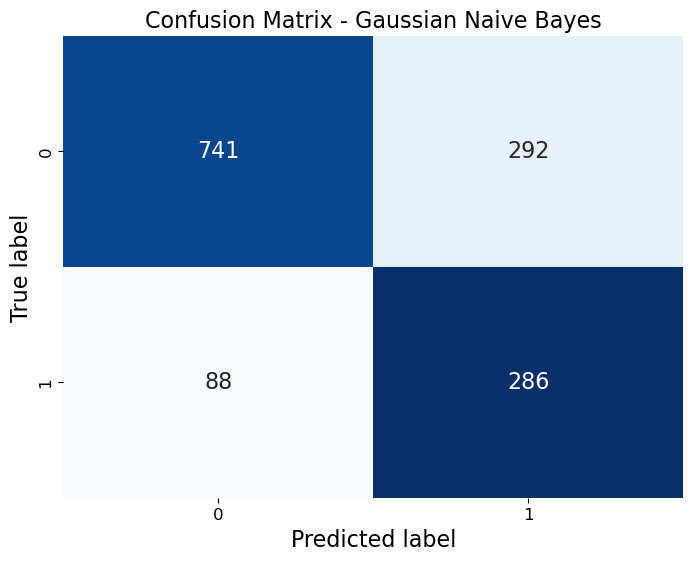

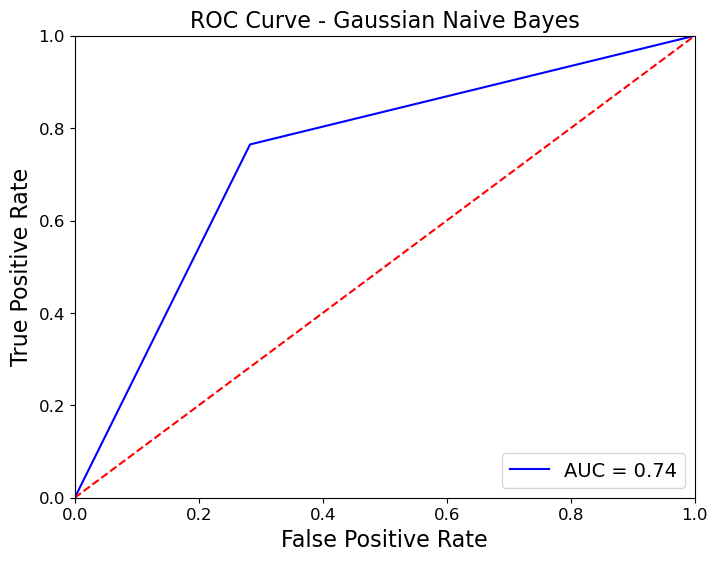

Accuracy: 0.7299218194740583
Precision: 0.6943288491157479
Recall: 0.7410170263652411
F1: 0.6983793517406962
AUC-ROC: 0.7410170263652411


In [9]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Plot evaluation metrics
plot_evaluation_metrics('Gaussian Naive Bayes', y_test, y_pred)
